In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df= pd.read_csv("/content/drive/MyDrive/weather prediction(time-series)/weatherHistory.csv")



In [24]:
print(df.shape)

(96453, 12)


In [25]:
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [26]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df = df.set_index('Formatted Date').sort_index()
df = df.interpolate(method='time')
df = df.reset_index()
df.head()

/tmp/ipython-input-1727391084.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='time')


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.


In [27]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.


In [28]:
df.isna().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [29]:
df["Precip Type"]=df["Precip Type"].fillna("none")

In [30]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [31]:
df[cat_cols] = df[cat_cols].fillna(method='ffill')


/tmp/ipython-input-2132005513.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[cat_cols] = df[cat_cols].fillna(method='ffill')


In [32]:
df.isna().sum()


,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [33]:
drop_cols = ['Daily Summary']
df = df.drop(columns=drop_cols, errors='ignore')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66
1,2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15
2,2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87
3,2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56
4,2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98


In [34]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))

df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2005-12-31 23:00:00+00:00,19,1,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66
1,2006-01-01 00:00:00+00:00,17,1,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15
2,2006-01-01 01:00:00+00:00,17,1,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87
3,2006-01-01 02:00:00+00:00,18,1,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56
4,2006-01-01 03:00:00+00:00,17,1,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98


In [35]:
df["Summary"].value_counts()

,count
Summary,
19,31733
17,28094
18,16597
6,10890
12,7148
4,528
3,516
5,386
11,86


In [36]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)'],
      dtype='object')

In [37]:
df = df.set_index('Formatted Date').sort_index()
df.index = pd.to_datetime(df.index)

In [38]:
df.index

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2016-12-31 13:00:00+00:00', '2016-12-31 14:00:00+00:00',
               '2016-12-31 15:00:00+00:00', '2016-12-31 16:00:00+00:00',
               '2016-12-31 17:00:00+00:00', '2016-12-31 18:00:00+00:00',
               '2016-12-31 19:00:00+00:00', '2016-12-31 20:00:00+00:00',
               '2016-12-31 21:00:00+00:00', '2016-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Formatted Date', length=96453, freq=None)

In [39]:
# core gradients
df['temp_diff'] = df['Temperature (C)'].diff()
df['humidity_diff'] = df['Humidity'].diff()
df['pressure_diff'] = df['Pressure (millibars)'].diff()
df['wind_diff'] = df['Wind Speed (km/h)'].diff()

# rolling signals
df['temp_roll3'] = df['Temperature (C)'].rolling(3).mean()
df['hum_roll3'] = df['Humidity'].rolling(3).mean()
df['pres_roll6'] = df['Pressure (millibars)'].rolling(6).mean()

# time structure
df['hour'] = df.index.hour
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear

df.tail()


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),temp_diff,humidity_diff,pressure_diff,wind_diff,temp_roll3,hum_roll3,pres_roll6,hour,month,dayofyear
Formatted Date,,,,,,,,,,,,,,,,,,,,
2016-12-31 18:00:00+00:00,17,1,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,-0.522222,0.01,0.21,-0.5796,1.027778,0.850000,1019.848333,18,12,366
2016-12-31 19:00:00+00:00,17,1,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,-0.416667,0.02,0.24,-0.3381,0.524074,0.863333,1019.886667,19,12,366
2016-12-31 20:00:00+00:00,17,2,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,-0.305556,0.01,0.23,-0.1449,0.109259,0.876667,1020.001667,20,12,366
2016-12-31 21:00:00+00:00,17,2,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,0.0,1020.65,-0.238889,0.02,0.15,-0.0322,-0.211111,0.893333,1020.161667,21,12,366
2016-12-31 22:00:00+00:00,17,2,-0.677778,-3.888889,0.92,9.2253,189.0,8.8711,0.0,1020.72,-0.205556,0.01,0.07,-0.0161,-0.461111,0.906667,1020.331667,22,12,366


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

df = pd.DataFrame(scaled, index=df.index, columns=df.columns)

df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),temp_diff,humidity_diff,pressure_diff,wind_diff,temp_roll3,hum_roll3,pres_roll6,hour,month,dayofyear
Formatted Date,,,,,,,,,,,,,,,,,,,,
2005-12-31 23:00:00+00:00,0.730769,0.5,0.362884,0.352912,0.89,0.268028,0.389972,0.620,0.0,0.971597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.0,0.99726
2006-01-01 00:00:00+00:00,0.653846,0.5,0.372334,0.365007,0.85,0.260212,0.387187,0.615,0.0,0.971110,0.539738,0.480,0.499755,0.446936,NaN,NaN,NaN,0.000000,0.0,0.00000
2006-01-01 01:00:00+00:00,0.653846,0.5,0.380524,0.366250,0.82,0.317196,0.389972,0.615,0.0,0.970842,0.536271,0.485,0.499865,0.501815,0.368167,0.830116,NaN,0.043478,0.0,0.00000
2006-01-01 02:00:00+00:00,0.692308,0.5,0.381244,0.380582,0.82,0.226929,0.389972,0.615,0.0,0.970546,0.515722,0.500,0.499851,0.377109,0.374449,0.803089,NaN,0.086957,0.0,0.00000
2006-01-01 03:00:00+00:00,0.653846,0.5,0.372694,0.372380,0.86,0.218356,0.373259,0.615,0.0,0.969992,0.490220,0.520,0.499721,0.446295,0.374573,0.806950,NaN,0.130435,0.0,0.00000


In [41]:
df = df.ffill().bfill()

In [42]:
df.isnull().sum()

,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0
Pressure (millibars),0


In [43]:
import numpy as np
inf_check = np.isinf(df.values).sum()

print("Infinite values found:", inf_check)
assert inf_check == 0, "❗ Infinite values present!"

# Outlier quick look
df.describe().T

Infinite values found: 0


,count,mean,std,min,25%,50%,75%,max
Summary,96453.0,0.615616,0.167750,0.0,0.653846,0.692308,0.730769,1.0
Precip Type,96453.0,0.552850,0.162210,0.0,0.500000,0.500000,0.500000,1.0
Temperature (C),96453.0,0.546835,0.154737,0.0,0.429484,0.547925,0.658717,1.0
Apparent Temperature (C),96453.0,0.575172,0.159509,0.0,0.447767,0.592246,0.694226,1.0
Humidity,96453.0,0.734899,0.195473,0.0,0.600000,0.780000,0.890000,1.0
Wind Speed (km/h),96453.0,0.169306,0.108274,0.0,0.091276,0.156077,0.221382,1.0
Wind Bearing (degrees),96453.0,0.522310,0.299118,0.0,0.323120,0.501393,0.807799,1.0
Visibility (km),96453.0,0.642691,0.260380,0.0,0.518000,0.624000,0.920000,1.0
Loud Cover,96453.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
Pressure (millibars),96453.0,0.958768,0.111785,0.0,0.967048,0.971397,0.975831,1.0


In [44]:
print(df.index.is_monotonic_increasing)
print(df.index.is_unique)

assert df.index.is_monotonic_increasing, "❗ timestamp not sorted properly"
assert df.index.is_unique, "❗ duplicated timestamps exist"
print("✓ Time index clean")

True
False


AssertionError: ❗ duplicated timestamps exist

In [45]:
df = df.groupby(df.index).mean()


In [46]:
df = df.drop(columns=['Loud Cover'])



In [47]:
print(df.index.is_monotonic_increasing)
print(df.index.is_unique)

assert df.index.is_monotonic_increasing, "❗ timestamp not sorted properly"
assert df.index.is_unique, "❗ duplicated timestamps exist"
print("✓ Time index clean")

True
True
✓ Time index clean


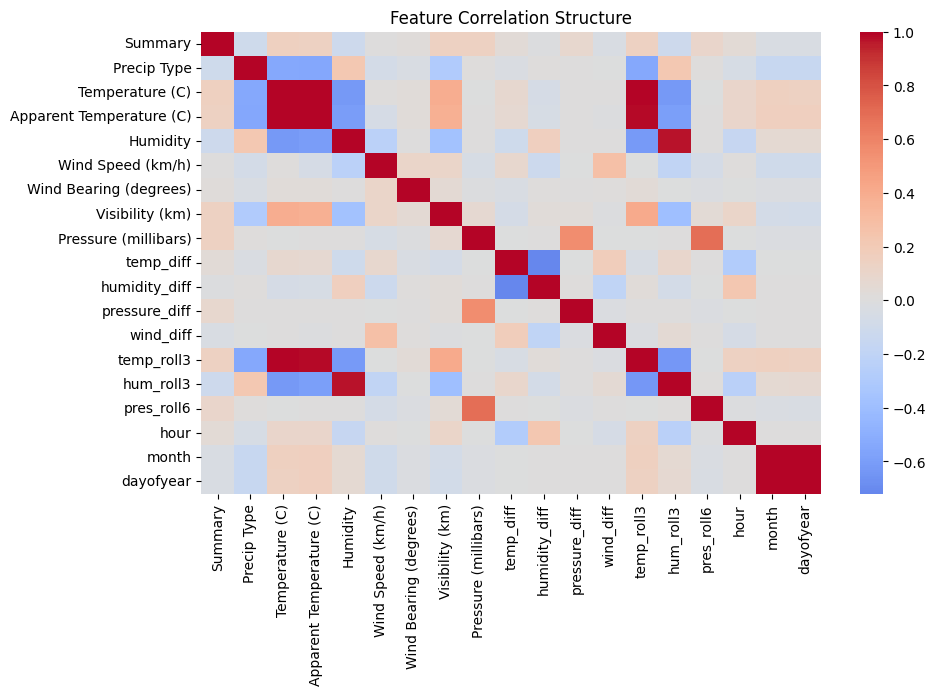

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Structure")
plt.show()


In [ ]:
import os
os.makedirs("/content/drive/MyDrive/weather prediction(time-series)/processed_data", exist_ok=True)

# Save processed dataframe
processed_path = "/content/drive/MyDrive/weather prediction(time-series)/processed_data/weather_processed.csv"
df.to_csv(processed_path)

In [49]:
import joblib

# Save MinMaxScaler / StandardScaler used during preprocessing
joblib.dump(scaler, "/content/drive/MyDrive/weather prediction(time-series)/saved_model/scaler.pkl")

['/content/drive/MyDrive/weather prediction(time-series)/saved_model/scaler.pkl']